In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib as mpl

datapath = os.path.join('datasets', 'lifesat', '')
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# oecd_bill_url = 'https://raw.githubusercontent.com/ageron/handson-ml/refs/heads/master/datasets/lifesat/oecd_bli_2015.csv'
# gdp_per_capita_url = 'https://raw.githubusercontent.com/ageron/handson-ml/refs/heads/master/datasets/lifesat/oecd_bli_2015.csv'
# oecd_bil_df = pd.read_csv(oecd_bill_url, thousands=',')
# gdp_per_capita_df = pd.read_csv(gdp_per_capita_url, thousands=',')

In [2]:
# Download data
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading...", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

Downloading... oecd_bli_2015.csv
Downloading... gdp_per_capita.csv


In [3]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [4]:
oecd_bli.head(5)
gdp_per_capita.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
# gdp_per_capita.head(5)

## Pivot -> rearranging or reshaping the data

# df = pd.DataFrame({
#     'Date': ['2023-01', '2023-01', '2023-02', '2023-02'],
#     'Product': ['A', 'B', 'A', 'B'],
#     'Sales': [100, 150, 200, 250]
# })
# df = df.pivot(index="Date", columns="Product", values="Sales")
# df = df.pivot(index="Product", columns="Date", values="Sales")
# df = df.pivot(index='Date', columns="Sales", values="Product")
# df
# df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
# df.rename(columns={"Date": "dates", "Product": '_products_', "Sales": '--sale--'}, inplace=False)

In [5]:

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
country_stat = prepare_country_stats(oecd_bli, gdp_per_capita)

In [7]:
country_stat.head(5)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [8]:
X = np.c_[country_stat['GDP per capita']]
y = np.c_[country_stat['Life satisfaction']]

# temp = np.c_[country_stat['GDP per capita'], country_stat['Life satisfaction']]

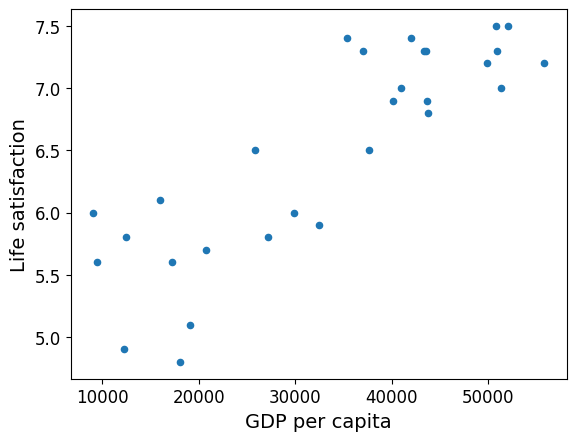

[[5.96242338]]


In [9]:
# Visualize the data
country_stat.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

# select the model
model = sklearn.linear_model.LinearRegression()

# train model
model.fit(X, y)

# make new prediction for Cyprus
X_new = [[22587]] # cyprus GDP per capita
print(model.predict(X_new))

In [10]:
from sklearn.neighbors import KNeighborsRegressor

model1 = KNeighborsRegressor(n_neighbors=3)

# train the model
model1.fit(X, y)

# Make prediction
print(model1.predict(X_new))

[[5.76666667]]


# Load and prepare life statisfaction data

In [11]:
oecd_bli = pd.read_csv(datapath+'oecd_bli_2015.csv', thousands=',')
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita data

In [12]:
gdp_per_capita = pd.read_csv(datapath+'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index('Country', inplace=True)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)

In [13]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc['United States']

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [14]:
remove_indices = [2, 1, 6, 8, 33, 34, 32]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [15]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Belgium,40106.632,6.9
Austria,43724.031,6.9
Czech Republic,17256.918,6.5
Estonia,17288.083,5.6
Turkey,9437.372,5.6
United Kingdom,43770.688,6.8
Switzerland,80675.308,7.5


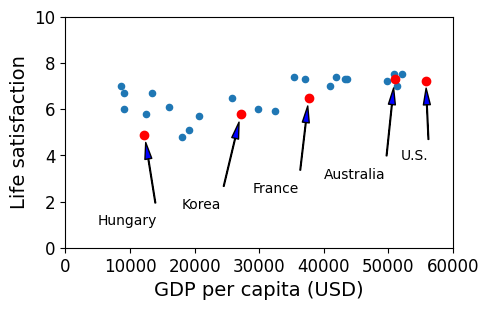

In [19]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='blue', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
# save_fig('money_happy_scatterplot')
plt.show()

In [20]:
# save sample data csv
sample_data.to_csv(os.path.join('datasets', 'lifesat', 'lifesat.csv'))

In [21]:
sample_data.loc[list(position_text.keys())]
# position_text.keys()

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


In [ ]:
# use for smooth range of values for ploting or numerical analysis.
# it also can be used from ploting a continuous line
# np.linspace(0, 60000, 1000)

# Plot line on scattter

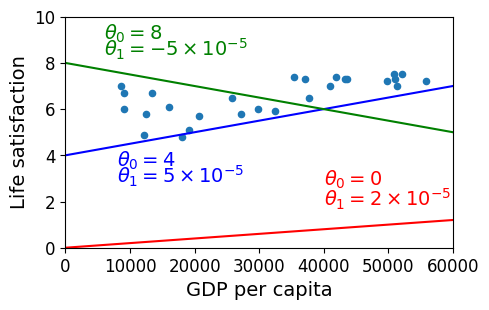

In [22]:

sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))
plt.xlabel('GDP per capita')
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, 'r')
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color='r')
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

plt.plot(X, 4+(5*X/10**5), 'b')
plt.text(8000, 3.5, r"$\theta_0 = 4$", fontsize=14, color='b')
plt.text(8000, 2.8, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

plt.plot(X, 8-(5*X/10**5), 'g')
plt.text(6000, 9, r"$\theta_0 = 8$", fontsize=14, color='g')
plt.text(6000, 8.3, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")


plt.show()

Before we can use our model, we need to define the parameter values theta_0 and theta_1. and How can we know which values will make your model perform best? For that we the performance measure.
Either we need to define a ***utility function (fitness function)*** how good the model is or a ***cost function*** that will measure how bad the model is.

Here the **Linear Regression** algorigthm comes in. Now we feed our traing set to the algorithm and it will finds the parameters ***(theta_0, theta_1)*** that make the linear model fit best to our data. and this procedure is also called **Traing** the model